In [38]:
import pandas as pd
import joblib
import glob

In [39]:
df = pd.read_csv("/Users/florian/Documents/github/DP2/Energy_production_price_prediction/HEFTcom24/data/features.csv")
df = df.drop(columns=['Unnamed: 0'])   

In [40]:
df['valid_time'] = pd.to_datetime(df['valid_time'])
df = df.sort_values(by='valid_time')

# Define the split dates
start_date = '2024-05-01'
end_date = '2024-05-02'

# Split data
train_df = df[df['valid_time'] < start_date]
test_df = df[(df['valid_time'] >= start_date) & (df['valid_time'] <= end_date)]

In [41]:
train_df = df[df['valid_time'] < start_date]
test_df = df[(df['valid_time'] >= start_date) & (df['valid_time'] <= end_date)]

X_train = train_df.drop(columns=["Solar_MWh_credit", "valid_time"])
y_train = train_df["Solar_MWh_credit"]
X_test = test_df.drop(columns=["Solar_MWh_credit", "valid_time"])
y_test = test_df["Solar_MWh_credit"]

In [42]:
model_paths = glob.glob("models/i1_models/*.pkl")

In [43]:
predictions = {model_path: joblib.load(model_path).predict(X_test) for model_path in model_paths}

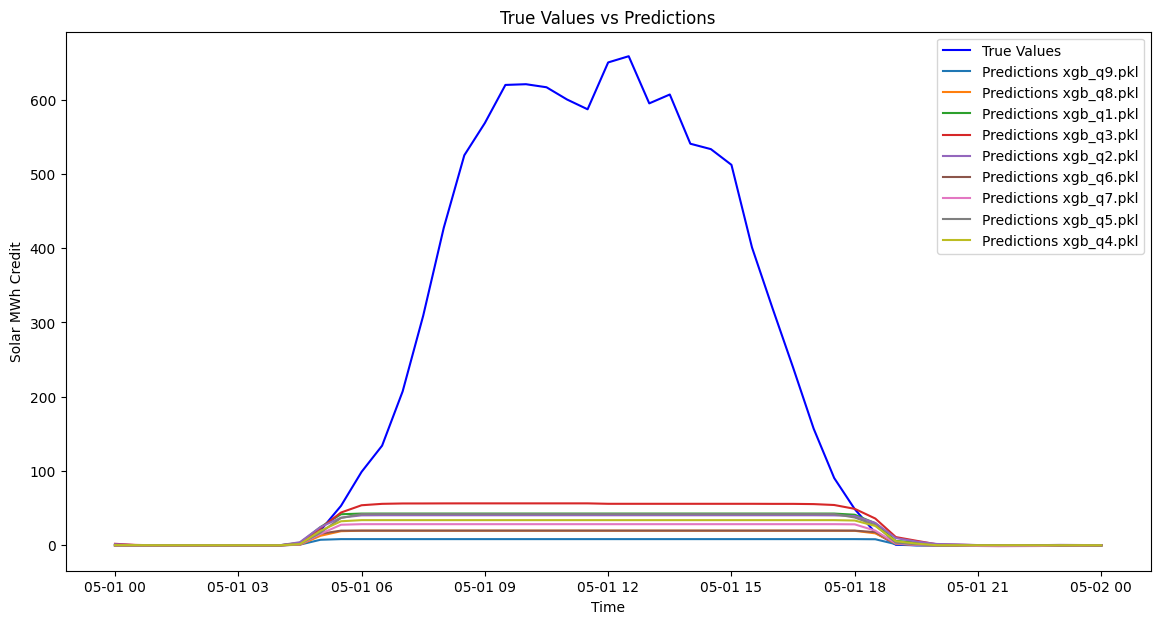

In [44]:
import matplotlib.pyplot as plt

# Plot the true values
plt.figure(figsize=(14, 7))
plt.plot(test_df['valid_time'], y_test, label='True Values', color='blue')

# Plot the predictions for each model
for model_path, prediction in predictions.items():
    plt.plot(test_df['valid_time'], prediction, label=f'Predictions {model_path.split("/")[-1]}')

plt.xlabel('Time')
plt.ylabel('Solar MWh Credit')
plt.title('True Values vs Predictions')
plt.legend()
plt.show()